# 09 - MODELO CLASIFICACIÓN TRAS THE BEST ESTIMATOR Y PRESELECCIÓN DE VARIABLES

Hemos comparado varios modelos de clasificación con parámetros para evitar el sobreajuste, preselección de variables y balanceo de datos. El mejor modelo ha sido el XGBClassifier (v6) sin preselección de variables con Smote-Tomek en el dataset. 

En este notebook entrenaremos el modelo definitivo (v6) con todos los datos de trabajo con el Smote-Tomek y crearemos el modelo de ejecución para predecir con los datos de prueba en el próximo notebook.

XGBClassifier: 

 - 'algoritmo__learning_rate': 0.05,
 - 'algoritmo__max_depth': 5,
 - 'algoritmo__n_estimators': 500,
 - 'algoritmo__n_jobs': -1,
 - 'algoritmo__reg_alpha': 0.1,
 - 'algoritmo__reg_lambda': 0.1,
 - 'algoritmo__verbosity': 0


## IMPORTACIÓN DE PAQUETES

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scikitplot as skplt

from xgboost import XGBClassifier

#metricas de evaluación
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Crear Pipeline
from sklearn.pipeline import make_pipeline

import cloudpickle

## IMPORTAR LOS DATOS

Utilizaremos los datos balanceados.

In [2]:
x = pd.read_pickle('../../02_Datos/03_Trabajo/x_balanceo.pickle')
y = pd.read_pickle('../../02_Datos/03_Trabajo/y_balanceo.pickle')

## MODELIZAR

### CARGAR EL MEJOR MODELO CON EL ALGORITMO, PARÁMETROS Y VALORES

In [3]:
modelo = pd.read_pickle('../../04_Modelos/Best_Estimator/XGBClassifier_v06.pickle')

### EXAMINAR MODELO

In [4]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=500,
                               n_jobs=-1, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [5]:
modelo.best_params_

{'algoritmo': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=-1, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'algoritmo__learning_rate': 0.05,
 'algoritmo__max_depth': 5,
 'algoritmo__n_estimators': 500,
 'algoritmo__n_jobs': -1,
 'algoritmo__reg_alpha': 0.1,
 'algoritmo__reg_lambda': 0.1,
 'algoritmo__verbosity': 0}

### PREDECIR SOBRE LA VALIDACIÓN

In [7]:
pred = modelo.best_estimator_.predict(x)
pred_proba = modelo.best_estimator_.predict_proba(x)[:,1]

### EVALUAR SOBRE LA VALIDACIÓN

In [8]:
v_roc_auc_proba = roc_auc_score(y, pred_proba)
v_roc_auc = roc_auc_score(y, pred)
v_accuracy = accuracy_score(y, pred)
v_report = classification_report(y, pred)

print(f"Roc AUC_proba: {v_roc_auc_proba}")
print(f"Roc AUC: {v_roc_auc}")
print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:{v_report}")

Roc AUC_proba: 0.9822628325718893
Roc AUC: 0.9508196721311476
Accuracy: 0.9508196721311475
Classification Report:              precision    recall  f1-score   support

           0       0.98      0.92      0.95        61
           1       0.92      0.98      0.95        61

    accuracy                           0.95       122
   macro avg       0.95      0.95      0.95       122
weighted avg       0.95      0.95      0.95       122



## REPORTING DEL MODELO

Matrix de Confusión MultiClass

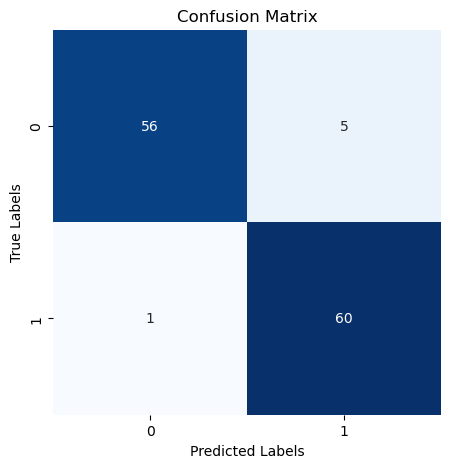

In [9]:
# Calcular la matriz de confusión
cm = confusion_matrix(y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix");


### Precision-Recall

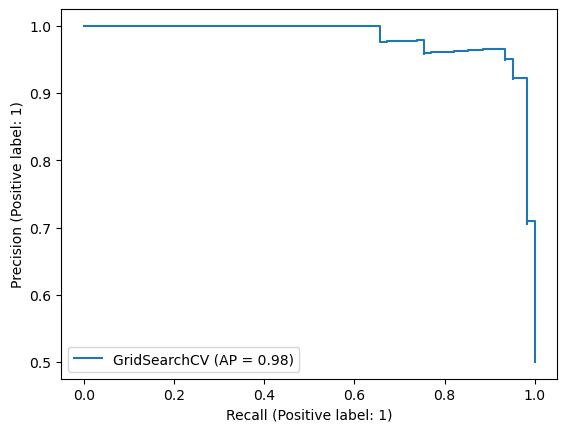

In [14]:
PrecisionRecallDisplay.from_estimator(modelo, x, y);

El mejor best_threshold: 0.5102043


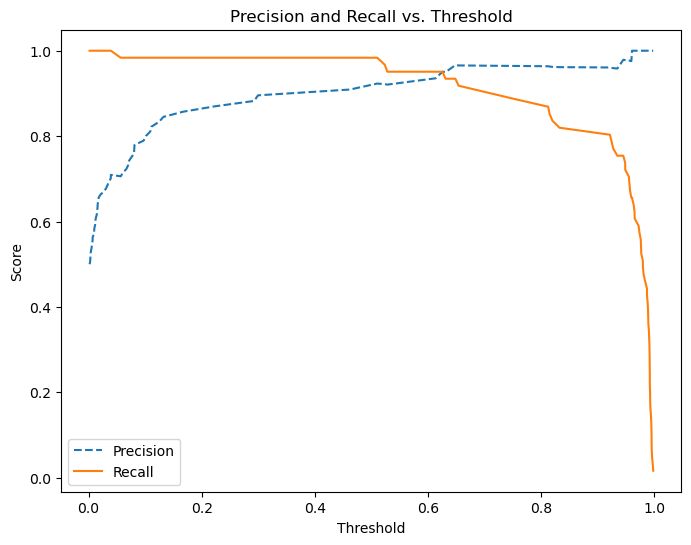

In [17]:
# Calcula la curva de precisión y recall para diferentes umbrales de corte
precision, recall, thresholds = precision_recall_curve(y, pred_proba)

# Grafica la relación entre la precisión y el recall en función del umbral de corte
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
plt.plot(thresholds, recall[:-1], label='Recall', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision and Recall vs. Threshold')

# Encuentra el umbral que maximiza F1-score (o ajusta según tus necesidades)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("El mejor best_threshold:", best_threshold)

### ROC Chart

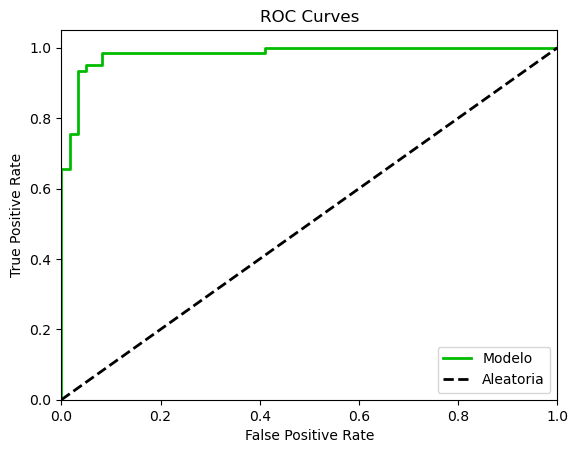

In [11]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(y, modelo.best_estimator_.predict_proba(x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()            
ax.lines[1].remove()
ax.lines[1].remove()
plt.legend(labels = ['Modelo','Aleatoria']);

## CREAR PIPELINE DE ENTRENAMIENTO Y EJECUCIÓN

### INSTANCIAR EL MODELO

In [18]:
modelo = XGBClassifier(
                        learning_rate =  0.05,
                        max_depth =  5,
                        n_estimators =  500,
                        n_jobs =  -1,
                        reg_alpha =  0.1,
                        reg_lambda =  0.1,
                        verbosity = 0
                        )

### CREAR Y GUARDAR EL PIPE FINAL DE ENTRENAMIENTO A

In [19]:
#crear pipe de entrenamiento
pipe_entrenamiento = make_pipeline(modelo)

In [20]:
# Guardar pipe de entrenamiento
nombre_pipe_entrenamiento = 'pipe_entrenamiento.pickle'
ruta_pipe_entrenamiento = '../../04_Modelos/' + nombre_pipe_entrenamiento

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(pipe_entrenamiento, file)

### ENTRENAR Y GUARDAR EL PIPE DE EJECUCIÓN

In [21]:
#Entrenar pipe de entrenamiento

pipe_ejecucion = pipe_entrenamiento.fit(x,y)

In [22]:
nombre_pipe_ejecucion = 'pipe_ejecucion.pickle'
ruta_pipe_ejecucion = '../../04_Modelos/' + nombre_pipe_ejecucion

with open (ruta_pipe_ejecucion, mode= 'wb') as file:
    cloudpickle.dump(pipe_ejecucion, file)

**CONCLUSIÓN:** El modelo ha dado muy buenos resultados obteniendo un AUC [1] del 98.2%.

- Roc AUC_proba: 0.9822628325718893
- Roc AUC: 0.9508196721311476
- Accuracy: 0.9508196721311475
- Classification Report:              
  
        precision    recall  f1-score   support

           0          0.98      0.92      0.95        61
           1          0.92      0.98      0.95        61

        accuracy                          0.95       122


**PRÓXIMOS PASOS:** Vamos a probar el modelo definitivo con los datos de prueba.